In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
auto_prices = pd.read_csv(r'D:\Microsoft Edx\Principles-of-Machine-Learning-Python-master\Module2\Automobile price data _Raw_.csv')
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Exploratory Data Analysis

In [169]:
!pip install GitPython

In [3]:
def clean_auto_data(auto_prices):
    
    
    auto_prices.columns = [x.replace('-','_') for x in auto_prices.columns]  #Scikit learn doesn't recognize speacial characters
    #print(auto_prices.columns)
    
    """this columns contains missing values equal to ?"""
    columns = ['bore','stroke','horsepower','peak_rpm','price']
    
    
    for column in columns:
        auto_prices.loc[auto_prices[column]=='?',column] = np.nan   # “axis 0” represents rows and “axis 1” represents columns.
    auto_prices.dropna(axis=0,inplace=True)
    
    
    for column in columns:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
    

    


In [4]:
clean_auto_data(auto_prices)
#auto_prices.dtypes

# Exploring the data

A column of datatype object means containig a text string

In [5]:
auto_prices.dtypes


symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [6]:
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Through auto_prices.describe() we are getting a lot of information about numerical variables columns of our dataset but not for categorical columns of dataset(because they cannot be computed)

1.count of our dataset.

2.mean and standard deviation (std deviation means spread of data in that column).

3.Quantiles information(25%, let say for price column means in whole dataset the 25 percent customer bought the car having price less than 7756 .50% customers bought the car having price less than 10245 and so on for the further prices.

4.min and max value that will help us to do rescaling for each column before do training of a model.

5.Have a look at mean and median(50%) the mean is value is more than median so it indicates that the the distribution is right skewed.(for more info learn kurtosis (that decides the shape of a distribution graph).

lets check the freuency of each column


In [7]:
def frequency_table(auto_prices,category_columns):
    
    for column in category_columns:
        print('\nFor column ',column,"\n\n",auto_prices[column].value_counts())
        


category_columns = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']

frequency_table(auto_prices,category_columns)


For column  make 

 toyota           32
nissan           18
mazda            13
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

For column  fuel_type 

 gas       175
diesel     20
Name: fuel_type, dtype: int64

For column  aspiration 

 std      159
turbo     36
Name: aspiration, dtype: int64

For column  num_of_doors 

 four    112
two      81
?         2
Name: num_of_doors, dtype: int64

For column  body_style 

 sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

For column  drive_wheels 

 fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

For column  engine_locat

In the above details we can check that for each category column there is class imbalance .we have more category features/columns respect to each category value in limited training dataset.Let say the column make has 21 category value out of which toyota is running on top and the car make like isuzu  and mercury have very less counts (1 & 2) so this would be problematic.

similary for column fuel type shows class imbalance problem (out of 195 ,20 datapoints are available of diesel cars).
similarly for column engine type,engine location(out of 195,192 are front and only 3 points are rear).


# BarPlot

Bar Plot is used to display frequency of each category varibales/features/columns

In [8]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

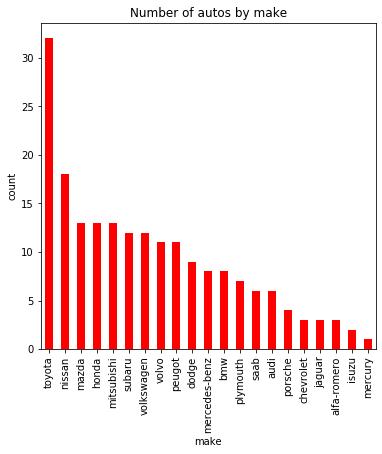

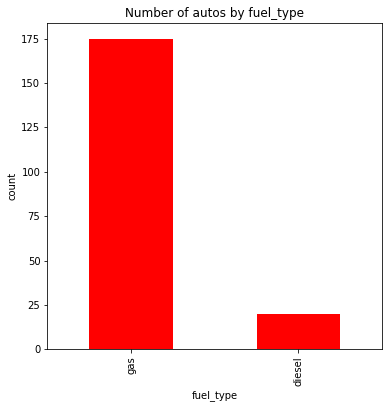

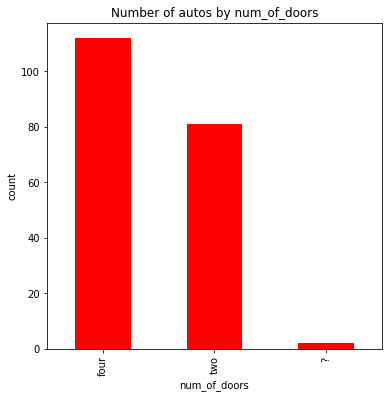

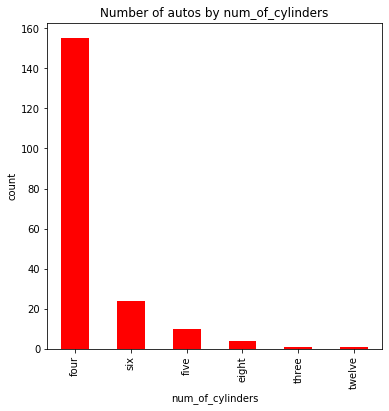

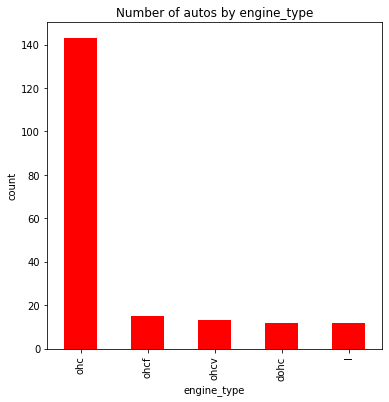

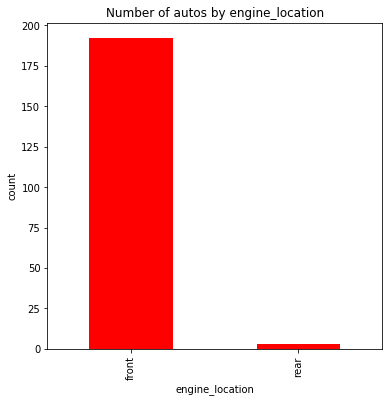

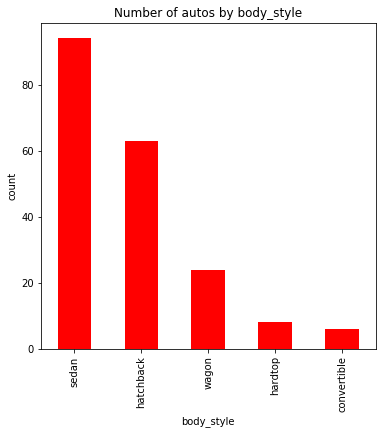

In [9]:
def plot_categoryvar(cat_col,auto_prices):
    
    for column in cat_col:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        counts = auto_prices[column].value_counts()
        counts.plot.bar(ax=ax,color='red')
        ax.set_title('Number of autos by ' + column)
        ax.set_xlabel(column)
        ax.set_ylabel('count')
        
    

cat_col = ['make','fuel_type','num_of_doors','num_of_cylinders','engine_type','engine_location','body_style']
plot_categoryvar(cat_col,auto_prices)

This would be problematic because in each category column u can see that there is large difference between the data values

# Histogram Plot

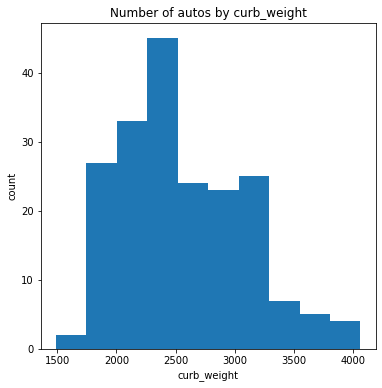

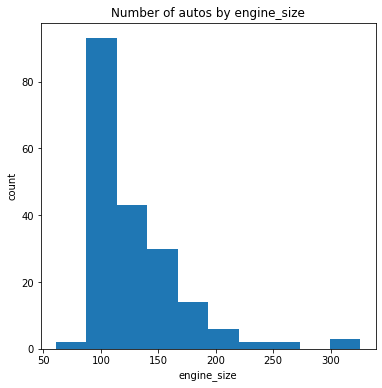

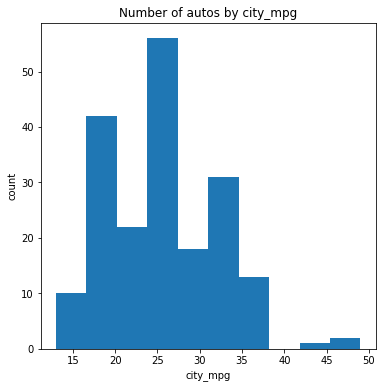

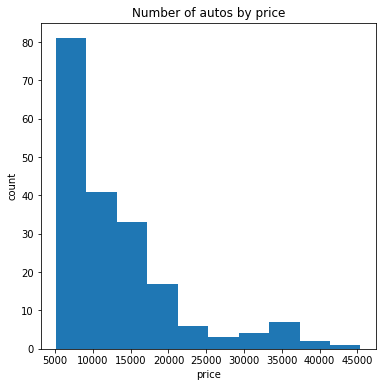

In [10]:
def histo_plot(auto_prices,num_cols,bins=10):
    for column in num_cols:
        
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        (auto_prices[column]).plot.hist(ax=ax,bins=bins)
        ax.set_title('Number of autos by ' + column)
        ax.set_xlabel(column)
        ax.set_ylabel('count')
        

num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price'] 
histo_plot(auto_prices,num_cols)

In the above histogram plots of numerical variables you can see curb_weight,engine_size and price are right skewed means they all have long tail on the right side

# Scatter Plot

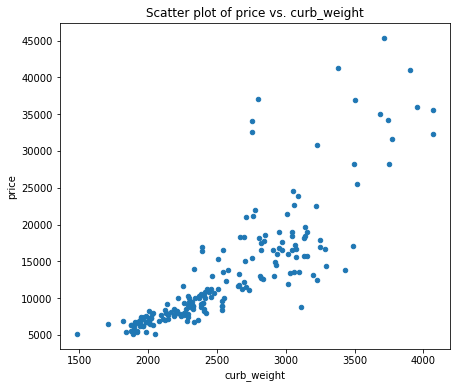

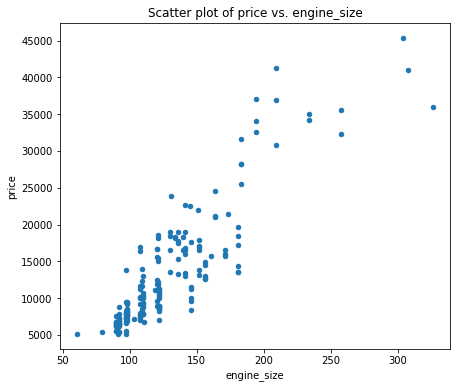

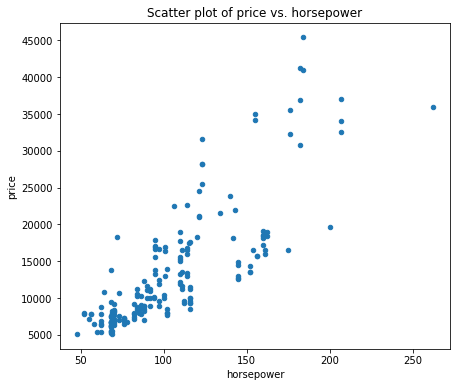

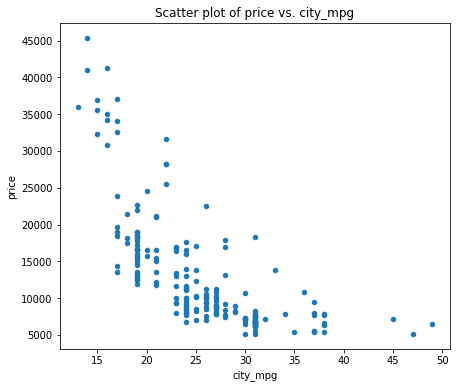

In [11]:
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)

In the above scatter plot we have shown that city_mpg and curb_weight are not linear.
But engine_size and horsepower are showing linearity.



Now we have to test whether all these linear models are covariate or not

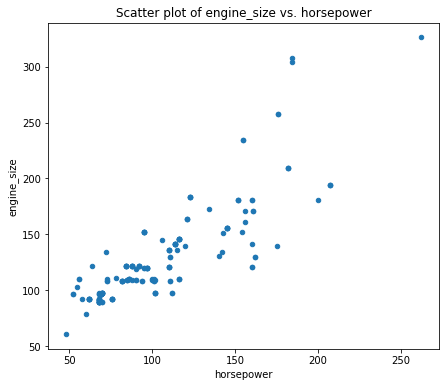

In [12]:
def plot_scatter(auto_prices, cols=['horsepower'], col_y = 'engine_size'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()
plot_scatter(auto_prices)

Assumption comes true.
By plotting the relation between engine_size and horsepower we found that both are collinear.

# Relation between category and numerical variables

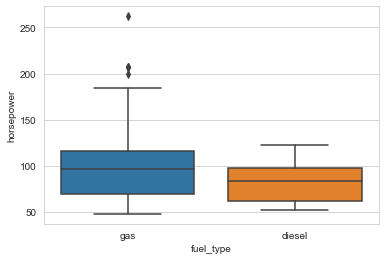

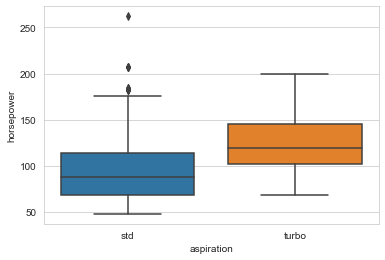

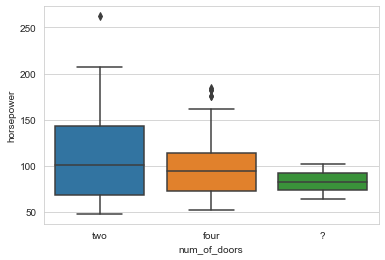

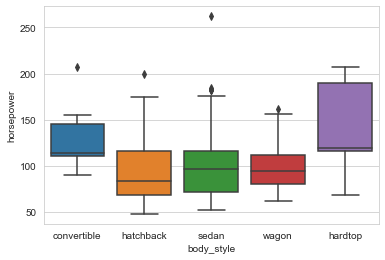

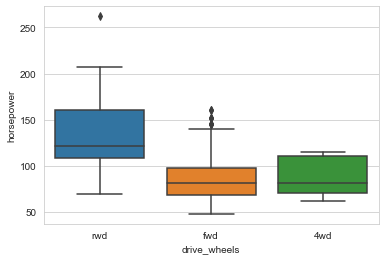

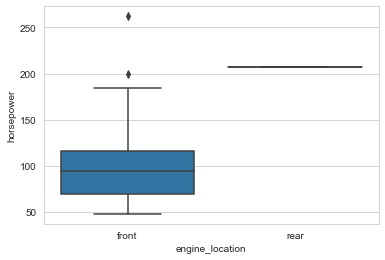

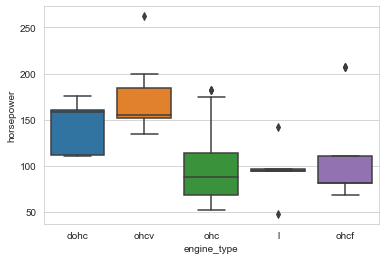

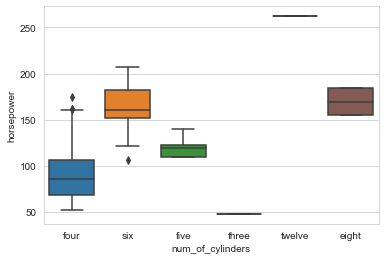

In [13]:
def plot_box(auto_prices, cols, col_y = 'horsepower'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']
plot_box(auto_prices, cat_cols)   

horsepower increase ------> Auto Price increase(linear graph between them)

# More Data Preparation is reuired

You have seen that by doing visualization between variables we got to know that there is need of modification especially in categorical features because they are containig less amount of their data values respective to a category.

Lets check  that how many features are containg missing value = ?

In [19]:
(auto_prices.astype(np.object)=='?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [20]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

Lets check the count of missing values 

In [28]:
for column in auto_prices.columns:
    if auto_prices[column].dtype==object:
        count = 0
        counts = [count+1 for x in auto_prices[column] if x=='?']
        print(column,"**************",sum(counts))
        

make ************** 0
fuel_type ************** 0
aspiration ************** 0
num_of_doors ************** 2
body_style ************** 0
drive_wheels ************** 0
engine_location ************** 0
engine_type ************** 0
num_of_cylinders ************** 0
fuel_system ************** 0


The normalized_losses feature has most no of missing values.so it would be better that this feature should be removed.

In [29]:
auto_prices.drop('normalized_losses',axis=1,inplace=True)  #please run this function only on time

In [32]:
auto_prices.shape

(195, 25)

In [ ]:
columns = ['bore','stroke','price','peak_rpm','horsepower']
for column in columns:
    auto_prices[column] = pd.to_numeric(auto_prices[column])  #because of '?' values it is necessary to convert the column datatype to numeric datatype
                                                              #but do only in numerical variables
auto_prices.dtypes    

# Feature Engineering

Whenever a dataset containing categorical columns it needs to be check that each category should have sufficient samples. 

In [34]:
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In visualization we seems that this feature i.e num_of_cylinders is playing important role to predict the price but this categorical column has very insufficient samples for each data values.So it needs to be aggregated.

In [35]:
cylinder_categories = {'three':'three_four','four':'three_four','five':'five_six','six':'five_six','eight':'eight_twelve','twelve':'eight_twelve'}

auto_prices['num_of_cylinders'] = [ cylinder_categories[x]  for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

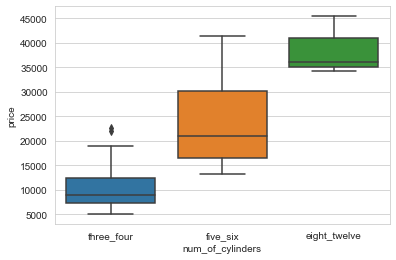

In [39]:
def plot_box(auto_prices,col,col_y='price'):
    sns.set_style('whitegrid')
    sns.boxplot(col,col_y,data=auto_prices)
plot_box(auto_prices,'num_of_cylinders')

now this time we can see there is more variation in each data values and they are also not overlapping.
Similarly we will do for feature body_style

In [40]:
auto_prices['body_style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [41]:
Body_style_cats = {'sedan':'sedan','hatchback':'hatchback','wagon':'wagon','hardtop':'hardtop_convertible','convertible':'hardtop_convertible'}
auto_prices['body_style'] = [ Body_style_cats[x] for x in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan                  94
hatchback              63
wagon                  24
hardtop_convertible    14
Name: body_style, dtype: int64

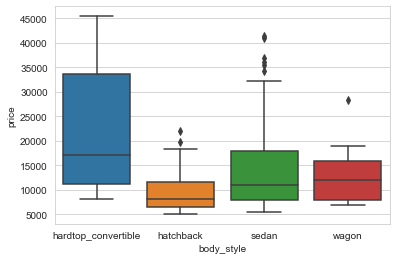

In [42]:
plot_box(auto_prices,'body_style')

hardtop_convertible category does appear to have values distinct from other body styles.

1.Lets have a look at the price column because the integer values of this column is very high.
2.The graph is right skewed (the right tail is more longer than left tail).
3.In the below graph we can see that the price is not less than around 8000 and also we can say not equal to zero.So in this type of case we can apply Logarithmic transform so that this feature can be more covariate with other features and also we are making the graph distribution close to normal.

Text(0.5, 1.0, 'Histogram for price')

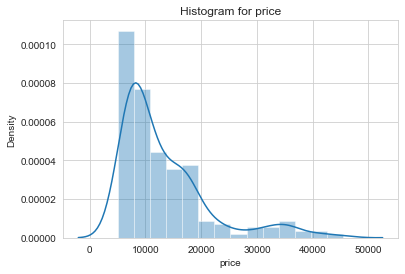

In [46]:
sns.distplot(auto_prices['price'])
plt.xlabel('price')
plt.ylabel('Density')
plt.title('Histogram for price')



Text(0.5, 1.0, 'Histogram for log_price')

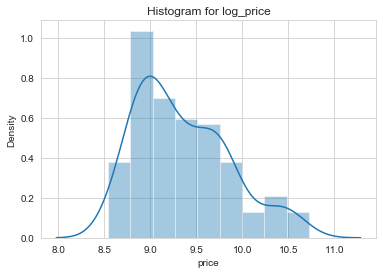

In [47]:
auto_prices['log_price'] = np.log(auto_prices['price'])
sns.distplot(auto_prices['log_price'])
plt.xlabel('price')
plt.ylabel('Density')
plt.title('Histogram for log_price')

1.By seeing the above graph we can see that it is looking almost symmetric and better than the histogram plot of price column.
2.In this graph we can see that the graph has right tail less skewed.

Now we have to check the effect of log_price on other features.How good is this by applying logarithmic function.

In [48]:
def plot_regression(auto_prices,cols,col_y='log_price'):
    for col in cols:
        sns.lmplot(x=col, y=col_y, hue='fuel_type', data=auto_prices)

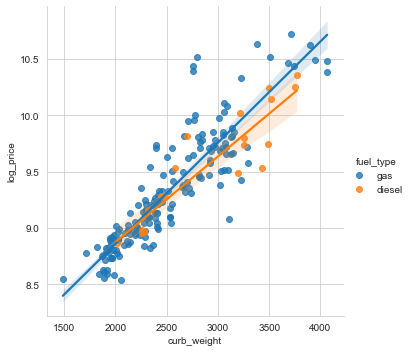

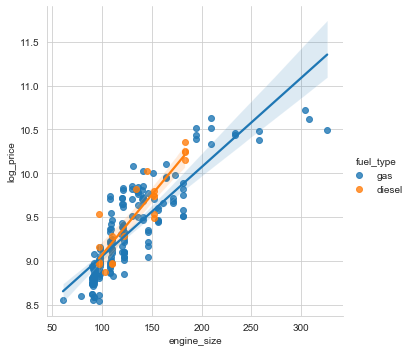

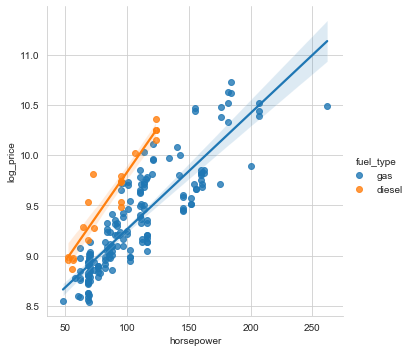

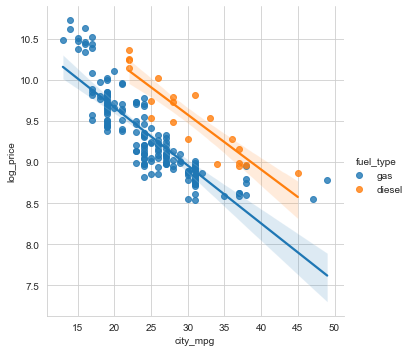

In [49]:
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_regression(auto_prices,num_cols)

Comparing the result obtained we can see that there is linear relationship between log_price and curb_weight.Similarly for city_mpg and log_price.Similarly for log_price and horsepower and log_price and engine_size.

In [50]:
#auto_prices.to_csv(r'D:\EDX_Ravi\Excel File\DataPreperation_Completed.csv',index=False)

# Now Time To prepare Model Matrix

In [51]:
auto_prices.shape

(195, 26)

In [52]:
auto_prices.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
0,3,alfa-romero,gas,std,two,hardtop_convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,alfa-romero,gas,std,two,hardtop_convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


Here in the above dataset we can see that there are both numerical and categorical dataset.

# First label the categorical data

In [101]:
# for feature bodystyle
from sklearn import preprocessing
#print(auto_prices['body_style'].unique())
Features = auto_prices['body_style']
le = preprocessing.LabelEncoder()
le = le.fit(Features)
print(le.classes_)
Features = le.transform(Features)
print(Features)

['hardtop_convertible' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 1 1 2 3 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2
 1 1 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1
 2 1 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2
 3 2 3 2 3 2 2 2 2 2]


# Second One Hot Encoding the Features

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
enc = OneHotEncoder(handle_unknown='ignore')
#print(Features.reshape(-1,1))
enc = enc.fit(Features.reshape(-1,1))
print(enc.categories_)
Features = enc.transform(Features.reshape(-1,1)).toarray()
Features[:20,:]

[array([0, 1, 2, 3])]


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

We can notice that body_style feature has been ecnoded to 4 columns. Each column is a dummy variable and represents a category value.

Now the same procedure is have to apply on other categorical features and append each category value as column
Let's say we have 2 category features and each contains 3 data values and the other one contains 2 data values,then total column would be 5.

In [104]:
# Now For other categorical features

def encode_string(cat):
    le = preprocessing.LabelEncoder()
    Features = auto_prices[cat]
    le = le.fit(Features)
    print(le.classes_)
    Features = le.transform(Features)
    enc = OneHotEncoder(handle_unknown='ignore')
    #print(Features.reshape(-1,1))
    enc = enc.fit(Features.reshape(-1,1))
    print(enc.categories_)
    Features = enc.transform(Features.reshape(-1,1)).toarray()
    return Features
    

categorical_features = ['fuel_type','aspiration','drive_wheels','num_of_cylinders']

for cat in categorical_features:
    temp = encode_string(cat)
    #print(temp.shape,Features.shape)
    Features = np.concatenate((Features,temp),axis=1)
print(Features.shape)

['diesel' 'gas']
[array([0, 1])]
['std' 'turbo']
[array([0, 1])]
['4wd' 'fwd' 'rwd']
[array([0, 1, 2])]
['eight_twelve' 'five_six' 'three_four']
[array([0, 1, 2])]
(195, 14)


In [105]:
Features[:2,:]

array([[1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.]])

1.So In the above function encode_string we have converted all the categorical data into dummy variables.
2.we have total 14 columns now(5 categorical fetaures data values sumup)

# Now Add Numerical Features

In [107]:
Features = np.concatenate((Features,np.array(auto_prices[['curb_weight','horsepower','city_mpg']])),axis=1)


In [108]:
Features.shape


(195, 17)

In [109]:
Features[:2,:]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01]])

# Split The Dataset

In [139]:
from sklearn.model_selection import train_test_split

labels = auto_prices['log_price'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(Features,labels, test_size=0.205, random_state=42)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)


(155, 17) (40, 17)
(155,) (40,)


# Rescaling the features

In [140]:
from sklearn.preprocessing import StandardScaler

1.Rescaling of features is very important and numerical features must be rescaled so that they have similar  range of values.

2.Scaler function is only for numerical variables not for categorical features.

In [146]:
scaler = StandardScaler().fit(X_train[:,14:])
#print(scaler.mean_)
X_train[:,14:] = scaler.transform(X_train[:,14:])
X_test[:,14:] = scaler.transform(X_test[:,14:])

In [147]:
X_train[:5,:]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.07049859,
         0.30651256, -0.26192713],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.21974508,
         0.27821629, -0.74717062],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.1724761 ,
        -0.23111668,  0.22331636],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -1.19225116,
        -0.88193102

# create object of linear regression model

In [148]:
from sklearn.linear_model import LinearRegression

In [150]:
lin_model = LinearRegression(fit_intercept=False).fit(X_train,Y_train)

In [152]:
print(lin_model.coef_) #coefficient of each features
print(lin_model.intercept_) #the intercept

[ 1.37717872  1.16419296  1.26131035  1.14692085  2.56190067  2.38770221
  2.46991835  2.47968453  1.60585586  1.62995407  1.71379295  1.70341986
  1.70458478  1.54159823  0.20017716  0.11120349 -0.06788241]
0.0


the firts 14 coefficients are for categorical data value and the last three coefficients are for 3 numerical variables

In [154]:
Y_predicted = lin_model.predict(X_test)

# Evaluate the model

In [159]:
import sklearn.metrics as sklm
import math

In [161]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
print_metrics(Y_test, Y_predicted, 26) 

Mean Square Error      = 0.03387468265855002
Root Mean Square Error = 0.1840507610920151
Mean Absolute Error    = 0.1422915286350727
Median Absolute Error  = 0.1013764675662916
R^2                    = 0.9069932019058792
Adjusted R^2           = 0.7409096338806634


Here we can see that R2 is very good and MSE,RMSE,MAE all are small but we need to check the further performance metrics also.

# Lets Draw the residual plot

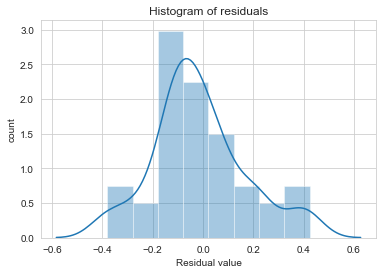

In [163]:
def hist_resids(Y_test, Y_predicted):
    ## first compute vector of residuals. 
    resids = np.subtract(Y_test.reshape(-1,1), Y_predicted.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(Y_test, Y_predicted) 

In the above we can see the histogram, the residuals are in small range.Basically in the Residual histogram we check whether the residuals are high at point zero or close to zero.If the range is small or graph is symmetric then we can say that our regression model is very good.

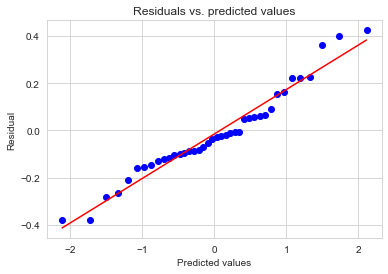

In [166]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(Y_test, Y_predicted) 

The Q-Q Normal plot indicates the residuals are close to Normally distributed, show some skew (deviation from the straight line). This is particularly for large residuals.If the points are lying on th straight line then we can say our regression model is very good.

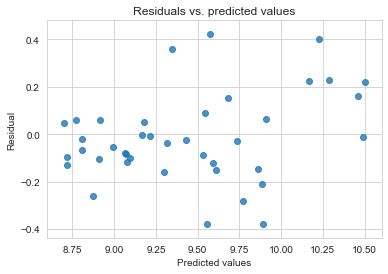

In [167]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(Y_test, Y_predicted) 

A few large residuals are noticeable on the positive sides ,but this look reasonable.this graph shows that the residuals does have small dispersion with respect to change in predicted values.

Lets convert the log_price into original price by applying the exponential function.

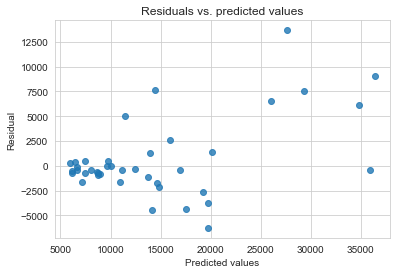

In [168]:
y_score_untransform = np.exp(Y_predicted)
y_test_untransform = np.exp(Y_test)
resid_plot(y_test_untransform, y_score_untransform) 

The residual values is dispersed towards the right side.
from this graph we can say that the residuals of less expensive car data points are close to zero whereas for expensive car data points the residual points are more dispersed as predicted values is changing.


# Conclusion

This model will work well for cheap cars but not for the expensive cars.
We need more data of expensive cars to resolve the class imbalance problem.

In [171]:
#git clone https:/github.com/RaviSahu12354/GitPython/Automobile-Pricing-DataSet-Problem

SyntaxError: invalid syntax (<ipython-input-171-1c2edf1384cb>, line 1)

In [172]:
pwd

'C:\\Users\\RAVI SAHU'